In [4]:
import numpy as np
from PIL import Image

img = Image.open('sakura.JPG')
img_arr = np.array(img)

img_shape = img_arr.shape
print(img_shape)

(562, 1000, 3)


In [5]:
X = np.reshape(img_arr, (img_shape[0] * img_shape[1], 3))
X.shape

(562000, 3)

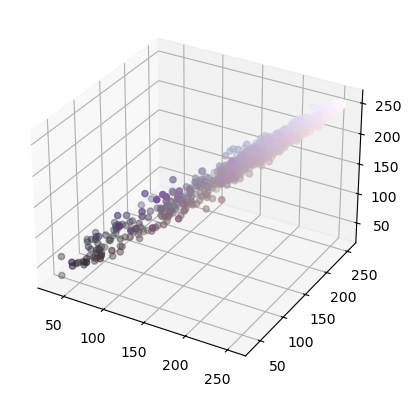

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n_points = 1000
ax.scatter(X[:n_points,0], X[:n_points, 1], X[:n_points, 2], marker='o', c=X[:n_points, :]/255)
plt.show()

In [7]:
from sklearn.cluster import KMeans

k = 3
kmeans_model = KMeans(n_clusters=k,
                      random_state=23).fit(X)

In [8]:
labels = kmeans_model.labels_
labels[:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [9]:
centroids = kmeans_model.cluster_centers_
centroids

array([[ 63.54619542,  57.82300202,  60.18131512],
       [199.21362544, 190.57338095, 196.42405741],
       [132.32937392, 123.65040878, 126.34855   ]])

In [10]:
X_cluster = np.array([centroids[cluster] for cluster in labels])
print(X_cluster.shape)
print(X_cluster[:20, :])

(562000, 3)
[[63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]
 [63.54619542 57.82300202 60.18131512]]


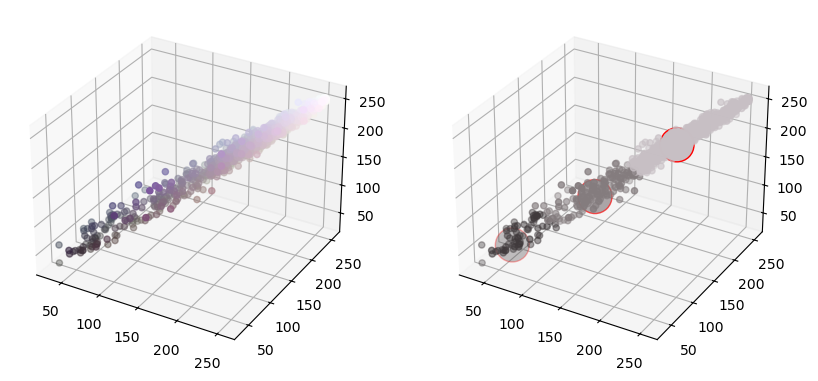

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), subplot_kw=dict(projection='3d'))
n_points = 1000

axs[0].scatter(X[:n_points,0], X[:n_points, 1], X[:n_points, 2], marker='o', c=X[:n_points, :]/255)
axs[1].scatter(X[:n_points,0], X[:n_points, 1], X[:n_points, 2], marker='o', c=X_cluster[:n_points, :]/255)
axs[1].scatter(centroids[:,0], 
               centroids[:, 1], 
               centroids[:, 2], 
               marker='o', 
               c=centroids/255, 
               s=600, 
               edgecolors="red")
plt.show()

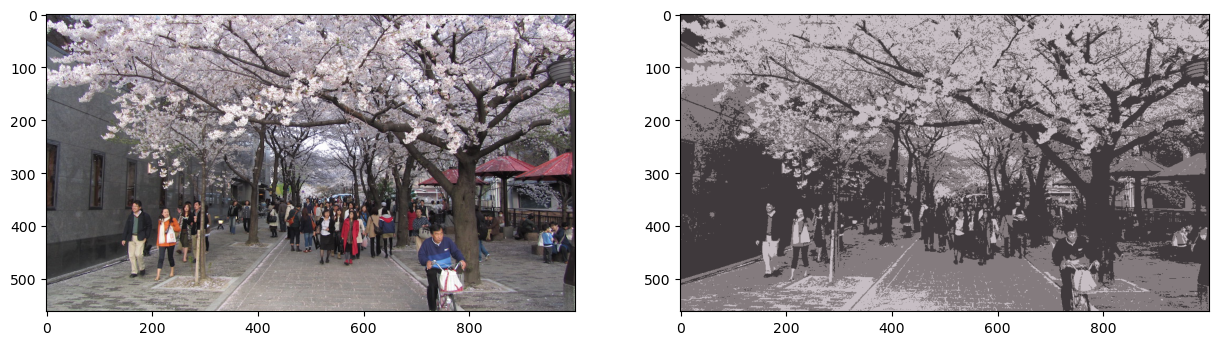

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
img_cluster = np.reshape(X_cluster / 255, img_shape)

axs[0].imshow(img)
axs[1].imshow(img_cluster)

In [13]:
result = Image.fromarray((img_cluster * 255).astype(np.uint8))
result.save('sakura.jpeg')